# 02. Neural Network classification with PyTorch

### Classification is a problem of predicting whether something is one thing or another


## 1. Make classification data and get it ready

In [105]:
import sklearn

In [106]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)


In [107]:
len(X), len(y)

(1000, 1000)

In [108]:
print(f"First 5 samples of X:\n{X[:5]}")
print(f"First 5 samples of y:\n{y[:5]}")

First 5 samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
[1 1 1 1 0]


In [109]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [110]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [111]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                       "X2": X[:, 1],
                       "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


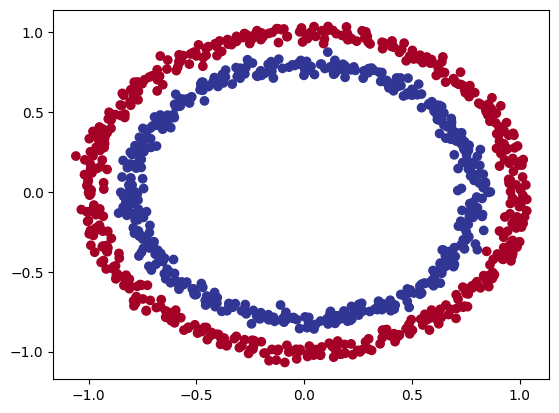

In [112]:
### Visualize!
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)


Note: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment on but still sizeable to practice the fundamentals.

### 1.1 Check input and output shapes

In [113]:
X.shape, y.shape

((1000, 2), (1000,))

In [114]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X:{X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X:{X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X:[0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X:(2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [115]:
# Turn data into tensors
import torch
from sklearn.datasets import make_circles

# Make 1000 samples (re-run to get original numpy arrays if needed)
n_samples = 1000
X_numpy, y_numpy = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

X = torch.from_numpy(X_numpy).type(torch.float)
y = torch.from_numpy(y_numpy).type(torch.float)

# Print the first 5 samples of X and y to verify
print(f"First 5 samples of X (tensor):\n{X[:5]}")
print(f"First 5 samples of y (tensor):\n{y[:5]}")

First 5 samples of X (tensor):
tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])
First 5 samples of y (tensor):
tensor([1., 1., 1., 1., 0.])


In [116]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [117]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [118]:
len(X_train), len(X_test), len(y_train), len(y_test) # 20% test, 80% train

(800, 200, 800, 200)

In [119]:
n_samples

1000

## 2. Build Model

Build model to classify blue and red dots
1. Setup device agnostic code
2. Construct model by subclassing nn.Module
3. Define loss function and Optimizer
4. Create training and test loop



In [120]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


In [121]:
!nvidia-smi

Sun Jul  6 20:49:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   71C    P0             30W /   70W |     158MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [122]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Create a model that:

1. Subclass nn.Module
2. Create 2 nn.linear() layers that are capable of handling our data shapes
3. Define forward()
4. Instantiate instance of model class and send to target device


In [123]:
from sklearn import datasets
# 1. Construct model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3. Define forward method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # X goes into layer 1 and the output of layer 1 goes into layer 2 and then layer 2 is outputted

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

### Behind the Scenes
1. Input: A 2D point like [x1, x2] — these could be features such as weight and height.

2. Hidden layer: Transforms the input into new features like [h1, h2, h3, h4, h5] — these are learned representations capturing patterns in the data.

3. Next layer(s): Continue transforming these representations until the final layer outputs a prediction indicating: “this belongs to class 0” or “class 1.”

In [124]:
device

'cuda'

In [125]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [126]:
# Replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [127]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3216, -0.2593],
                      [-0.2056,  0.1421],
                      [-0.6459, -0.6792],
                      [-0.5282, -0.5721],
                      [-0.0205,  0.5542]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5427, -0.4048,  0.1207, -0.1525,  0.4507], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2338, -0.2850,  0.2211,  0.3592,  0.3006]], device='cuda:0')),
             ('1.bias', tensor([0.1304], device='cuda:0'))])

In [128]:
# Make some predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n {torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
 tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0')

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [129]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [130]:
### 2.1 Setup loss function and optimzer

loss_fn = torch.nn.BCEWithLogitsLoss() # Binary Cross Entropy Loss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

#

In [131]:
# Calculate accuracy - out of 100 examples how many does our model get right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

### Train model

1. Forward pass
2. Calculate loss
3. Optimizer zero grad
4. Loss backward
5. Gradient descent

### 3.1 Going from raw logits -> prediction probabilities -> predicition labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (sigmoid for binary crossentropy and softmax for multiclass classification).

Then we can covert our models prediction probabilities to **prediciton labels** by either rounding them or taking the argmax().

In [132]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits


tensor([[0.4417],
        [0.3149],
        [0.6773],
        [0.3754],
        [0.5233]], device='cuda:0')

In [133]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [134]:
# Use sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6087],
        [0.5781],
        [0.6631],
        [0.5928],
        [0.6279]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

* y_pred_probs >= 0.5, y=1 (class 1)
* y_pred_probs < 0.5, y=0 (class 0)

In [135]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (raw logits -> prediction probabilities -> predicition labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

### Overall Understanding

1. A neural network processes input data and produces a logit as its final output.

2. This logit is then passed through the activation (in our case: sigmoid) function.

3. The sigmoid function "squashes" the logit into a value between 0 and 1, which represents the probability of the input belonging to the positive class.

4. If the sigmoid output is above a certain threshold (e.g., 0.5), the input is classified as belonging to the positive class.

5. If the sigmoid output is below the threshold, it is classified as belonging to the negative class.

In [136]:
### 3.2 Building training and testing loop

torch.manual_seed = 42
torch.cuda.manual_seed

#Set epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device) #(raw logits -> prediction probabilities -> predicition labels)

# Training loop
for epoch in range(epochs):
  ### Training
  model_0.train() # Put model in training mode

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), y_train) #nn.BCELoss expects prediction probabilities as input

  loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing
  model_0.eval() # Put model in eval mode

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what is happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.72680, Acc: 50.00% | Test Loss: 0.71561, Test Acc: 50.00%
Epoch: 10 | Loss: 0.70847, Acc: 50.00% | Test Loss: 0.70041, Test Acc: 50.00%
Epoch: 20 | Loss: 0.70112, Acc: 55.75% | Test Loss: 0.69490, Test Acc: 59.00%
Epoch: 30 | Loss: 0.69774, Acc: 55.00% | Test Loss: 0.69284, Test Acc: 55.50%
Epoch: 40 | Loss: 0.69598, Acc: 53.75% | Test Loss: 0.69213, Test Acc: 51.00%
Epoch: 50 | Loss: 0.69497, Acc: 52.25% | Test Loss: 0.69199, Test Acc: 51.50%
Epoch: 60 | Loss: 0.69433, Acc: 52.38% | Test Loss: 0.69210, Test Acc: 51.00%
Epoch: 70 | Loss: 0.69392, Acc: 52.62% | Test Loss: 0.69231, Test Acc: 51.00%
Epoch: 80 | Loss: 0.69364, Acc: 51.75% | Test Loss: 0.69257, Test Acc: 51.00%
Epoch: 90 | Loss: 0.69345, Acc: 51.12% | Test Loss: 0.69283, Test Acc: 53.50%
Epoch: 100 | Loss: 0.69332, Acc: 50.50% | Test Loss: 0.69309, Test Acc: 56.00%
Epoch: 110 | Loss: 0.69322, Acc: 51.00% | Test Loss: 0.69332, Test Acc: 54.50%
Epoch: 120 | Loss: 0.69316, Acc: 51.25% | Test Loss: 0.69352, T

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isnt learning_curve

To inspect lets make predictions and visualize

To do so, import a function called **plot_decision_boundry**



In [137]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists


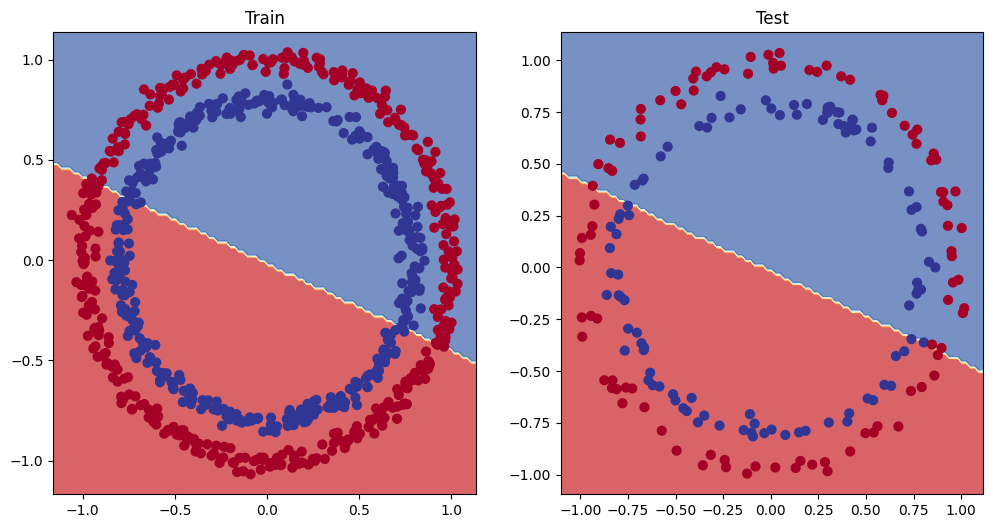

In [138]:
# Plot decision boundry of the model
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model:

* Add more layers - give the model moe chances to learn about patterns in the data.
* Add more hidden units - go from 5 hidden units to 10 hidden units.
* Fit for longer (more epochs)
* Changing the activiation function
* Change the learning rate
* Change the loss function


* These options are all from a **model's perspective** because they deal directly wiht the model, rather than with the data.




## Improve this model by:
* Adding hidden units
* Increase the number of layers: 2 -> 3
* Increase number of epochs

In [139]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(x)
    # z = self.layer_3(x)
    return self.layer_3(self.layer_2(self.layer_1(x))) # This way of writing operations leverages speed ups behind the scenes

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [140]:
# Create a loss function
loss_fn = torch.nn.BCEWithLogitsLoss()

# Create Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

# Write a training and eval loop
manual_seed = 42
torch.cuda.manual_seed(manual_seed)

epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Logits -> probabilites -> labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3.
  optimizer.zero_grad()

  # 4.
  loss.backward()

  # 5.
  optimizer.step()

  ### Testing
  model_1.eval() # Put model in eval mode

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what is happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}%, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}%, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69348%, Acc: 50.00% | Test Loss: 0.69266%, Test Acc: 50.50%
Epoch: 10 | Loss: 0.69339%, Acc: 50.62% | Test Loss: 0.69282%, Test Acc: 49.00%
Epoch: 20 | Loss: 0.69332%, Acc: 50.50% | Test Loss: 0.69297%, Test Acc: 48.50%
Epoch: 30 | Loss: 0.69326%, Acc: 50.25% | Test Loss: 0.69311%, Test Acc: 49.00%
Epoch: 40 | Loss: 0.69322%, Acc: 49.50% | Test Loss: 0.69324%, Test Acc: 51.00%
Epoch: 50 | Loss: 0.69318%, Acc: 49.12% | Test Loss: 0.69337%, Test Acc: 51.50%
Epoch: 60 | Loss: 0.69314%, Acc: 49.50% | Test Loss: 0.69348%, Test Acc: 51.50%
Epoch: 70 | Loss: 0.69312%, Acc: 50.00% | Test Loss: 0.69358%, Test Acc: 50.00%
Epoch: 80 | Loss: 0.69309%, Acc: 50.25% | Test Loss: 0.69368%, Test Acc: 51.00%
Epoch: 90 | Loss: 0.69308%, Acc: 50.62% | Test Loss: 0.69377%, Test Acc: 49.50%
Epoch: 100 | Loss: 0.69306%, Acc: 50.88% | Test Loss: 0.69385%, Test Acc: 47.50%
Epoch: 110 | Loss: 0.69305%, Acc: 50.38% | Test Loss: 0.69393%, Test Acc: 48.00%
Epoch: 120 | Loss: 0.69304%, Acc: 50.50

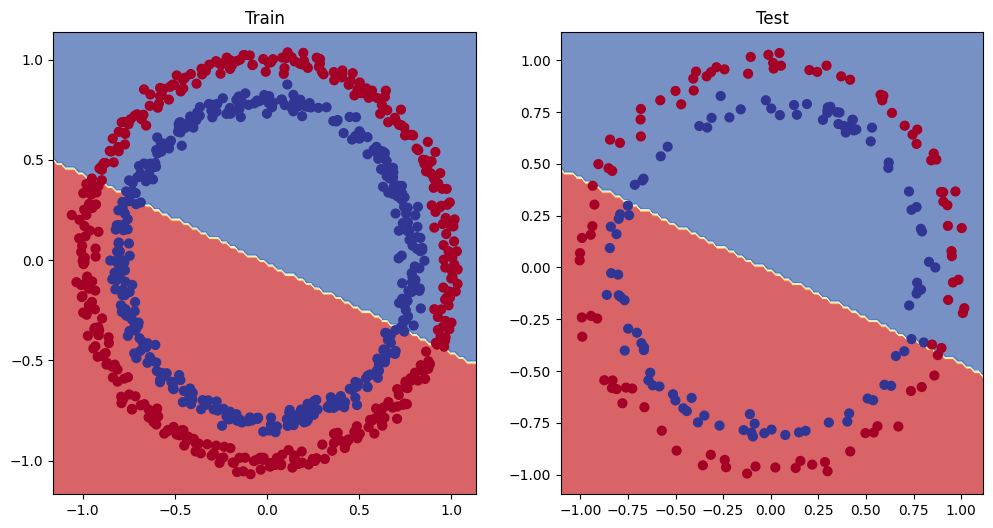

In [141]:
# Plot decision boundry of the model
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [142]:
# Create some data
weight = .7
bias = .3
start = 0
end = 1
step = .01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [143]:
# Create train and test split
train_test_split = int(0.8 * len(X_regression))
X_train_regression = X_regression[:train_test_split]
y_train_regression = y_regression[:train_test_split]
X_test_regression = X_regression[train_test_split:]
y_test_regression = y_regression[train_test_split:]

# Check lengths
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

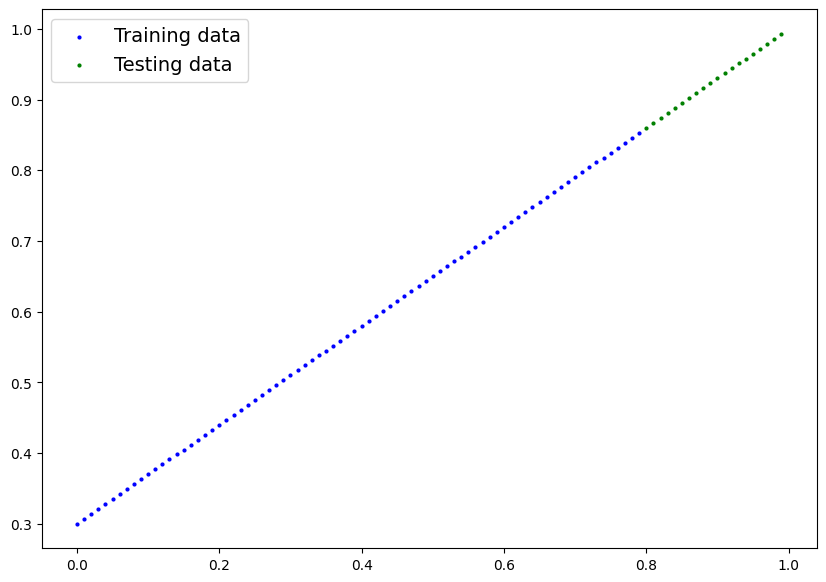

In [144]:
plot_predictions(train_data = X_train_regression,
                 train_labels = y_train_regression,
                 test_data = X_test_regression,
                 test_labels = y_test_regression)

In [145]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [146]:
### 5.2 Adjusting model_1 to fit a straight line
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [147]:
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [148]:
# Same architecture as model_1 (but using sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [149]:
# Loss and optimizer
loss_fn = torch.nn.L1Loss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [150]:
# Write a training and eval loop
manual_seed = 42
torch.cuda.manual_seed(manual_seed)

epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


for epoch in range(epochs):
  ### Training
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what is happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}%, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}%")

Epoch: 0 | Loss: 0.22361%, Acc: 51.00% | Test Loss: 0.33351%
Epoch: 100 | Loss: 0.03709%, Acc: 51.00% | Test Loss: 0.00270%
Epoch: 200 | Loss: 0.03455%, Acc: 51.00% | Test Loss: 0.00420%
Epoch: 300 | Loss: 0.03103%, Acc: 51.00% | Test Loss: 0.00414%
Epoch: 400 | Loss: 0.02788%, Acc: 51.00% | Test Loss: 0.00433%
Epoch: 500 | Loss: 0.02600%, Acc: 51.00% | Test Loss: 0.00562%
Epoch: 600 | Loss: 0.02502%, Acc: 51.00% | Test Loss: 0.00475%
Epoch: 700 | Loss: 0.02447%, Acc: 51.00% | Test Loss: 0.00559%
Epoch: 800 | Loss: 0.02400%, Acc: 51.00% | Test Loss: 0.00550%
Epoch: 900 | Loss: 0.02244%, Acc: 51.00% | Test Loss: 0.00468%


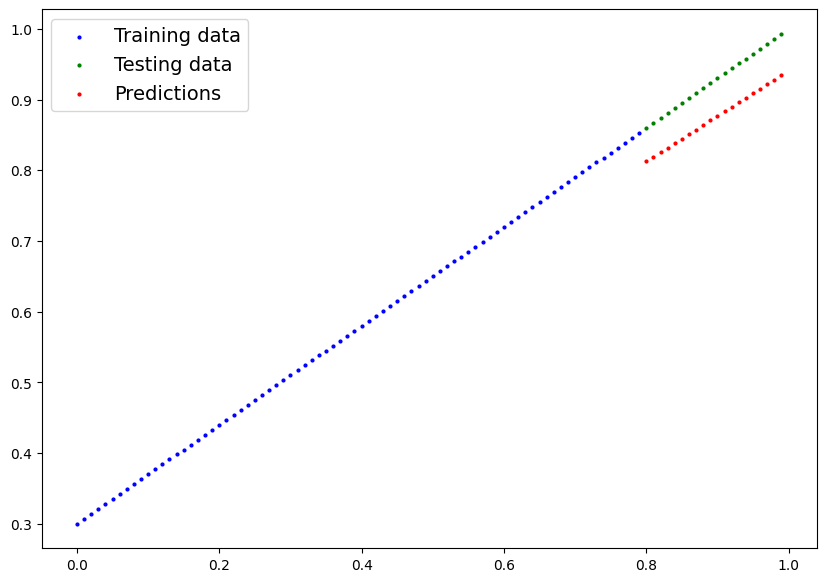

In [151]:
# Predictions
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot predictions
plot_predictions(train_data = X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels = y_test_regression.cpu(),
                 predictions = y_preds.cpu())

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of straight and non-linear lines?"

Or in ML terms, an infinite (not truly infinite) amount of linear/non-linear functions.

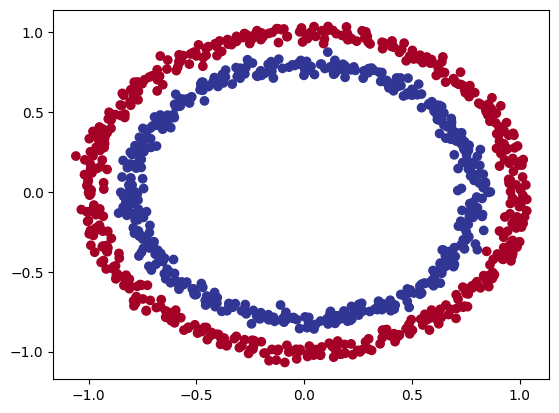

In [152]:
### 6.1 Recreating non-linear data (red and blue circles)
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [153]:
# Convert data to tensors and then to train/test splits
import torch
from sklearn.model_selection import train_test_split

# # Turn data into tensors
# X = torch.from_numpy(X).type(torch.float)
# y = torch.from_numpy(y).type(torch.float)

# Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(array([[ 0.65794626, -0.46508097],
        [ 0.63194897, -0.7346633 ],
        [-1.00861631, -0.12403051],
        [-0.96657519, -0.22562157],
        [-0.16659009,  0.79944645]]),
 array([1, 0, 0, 0, 1]))

In [154]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

### 6.2 Building a model with non-linearity

In [155]:
# Build model with non-linear activation funcitons
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # ReLu is a non-linear activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [156]:
len(X_test), len(y_test), len(test_logits)

(200, 200, 200)

In [157]:
# Create a loss function
loss_fn = torch.nn.BCEWithLogitsLoss()

# Create Optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

# Write a training and eval loop
manual_seed = 42
torch.cuda.manual_seed(manual_seed)

# Put data to target device
# Convert data to tensors first
X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train() # Put model in training mode

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Logits -> probabilites -> labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, #nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3.
  optimizer.zero_grad()

  # 4.
  loss.backward() # Backpropogation

  # 5.
  optimizer.step() # Gradient Descent

  ### Testing
  model_3.eval() # Put model in testing mode

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what is happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69799, Acc: 50.00% | Test Loss: 0.69677, Test Acc: 50.00%
Epoch: 10 | Loss: 0.69552, Acc: 50.00% | Test Loss: 0.69482, Test Acc: 50.00%
Epoch: 20 | Loss: 0.69462, Acc: 50.00% | Test Loss: 0.69415, Test Acc: 50.00%
Epoch: 30 | Loss: 0.69416, Acc: 52.00% | Test Loss: 0.69378, Test Acc: 44.50%
Epoch: 40 | Loss: 0.69380, Acc: 49.38% | Test Loss: 0.69349, Test Acc: 48.00%
Epoch: 50 | Loss: 0.69356, Acc: 46.38% | Test Loss: 0.69337, Test Acc: 52.00%
Epoch: 60 | Loss: 0.69339, Acc: 45.25% | Test Loss: 0.69331, Test Acc: 47.50%
Epoch: 70 | Loss: 0.69324, Acc: 42.62% | Test Loss: 0.69325, Test Acc: 45.50%
Epoch: 80 | Loss: 0.69310, Acc: 50.00% | Test Loss: 0.69320, Test Acc: 50.00%
Epoch: 90 | Loss: 0.69296, Acc: 50.00% | Test Loss: 0.69315, Test Acc: 50.00%
Epoch: 100 | Loss: 0.69282, Acc: 50.00% | Test Loss: 0.69309, Test Acc: 50.00%
Epoch: 110 | Loss: 0.69268, Acc: 50.00% | Test Loss: 0.69304, Test Acc: 50.00%
Epoch: 120 | Loss: 0.69254, Acc: 50.00% | Test Loss: 0.69298, T

### 6.4 Evaluating a model trained with non-linear activation funcitons

In [158]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 1., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

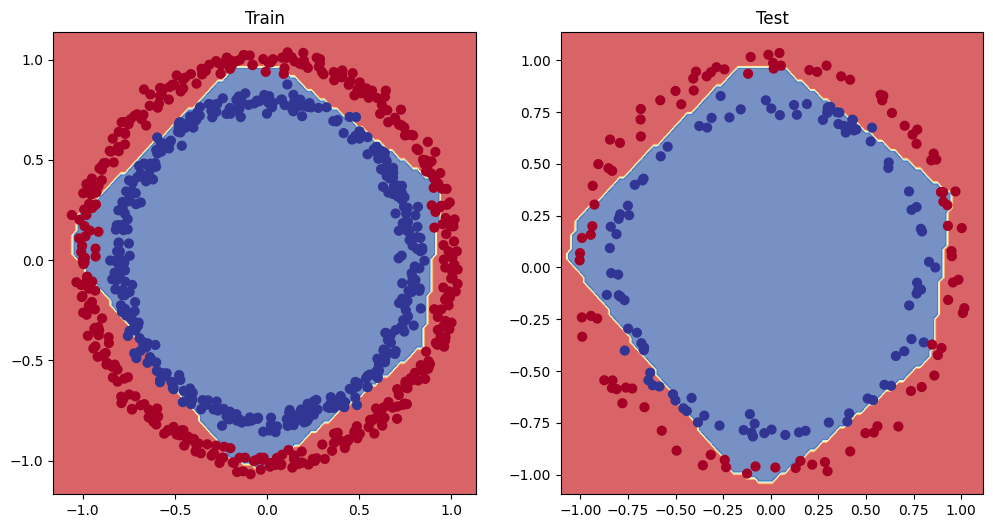

In [159]:
# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating Non-linear activation functions

* Neural Networks, rather than telling the model what to learn, we give it the tools to discover patterns in the data and it figures out patterns on its own.
  * These tools are linear & non-linear functions such as Relu().

In [160]:
# Create tensor
A = torch.arange(-10,10,1, dtype=torch.float32)
A.dtype
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

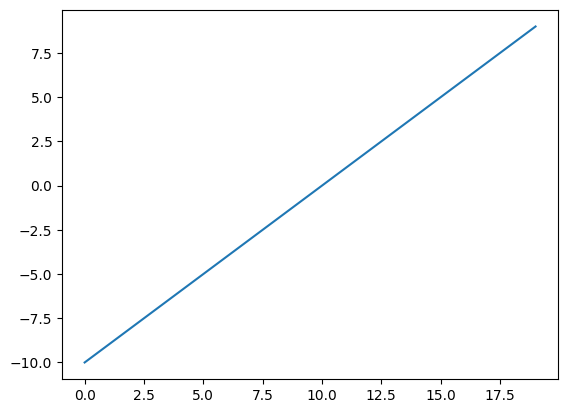

In [161]:
plt.plot(A)

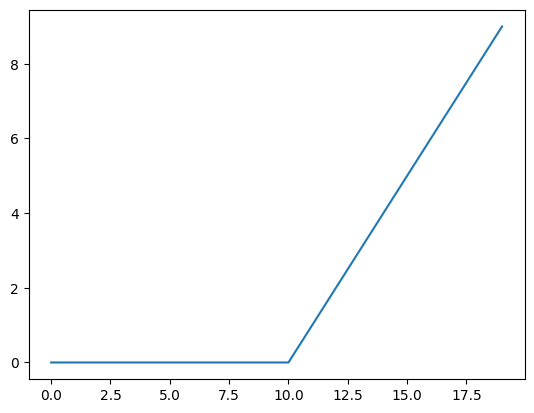

In [162]:
plt.plot(torch.relu(A))

In [163]:
def relu(x: torch.Tensor):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A) # relu turns all negative elements to 0 and leaves positive elements as they are

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

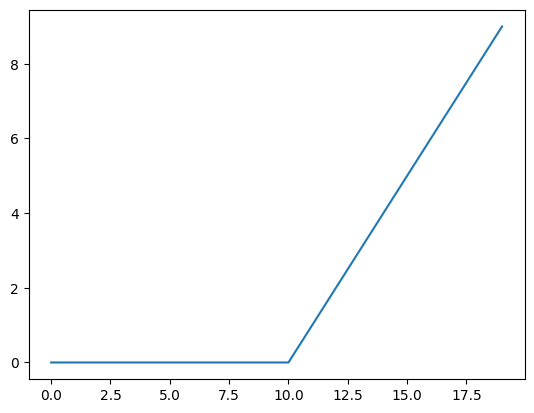

In [164]:
plt.plot(torch.relu(A))

In [165]:
# Do the same for sigmoid
def sigmoid(x: torch.Tensor):
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

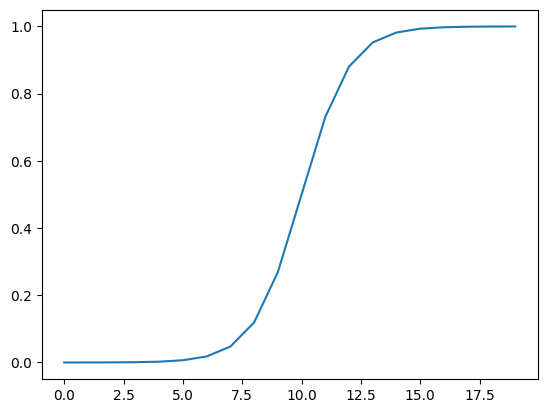

In [166]:
plt.plot(sigmoid(A))

### 8. Putting it all together with a multi-class classification problem

* Binary classification - One thing or the other
* Multi-class - more than 1's and 0's


### 8.1 Creating a toy multi-class dataset

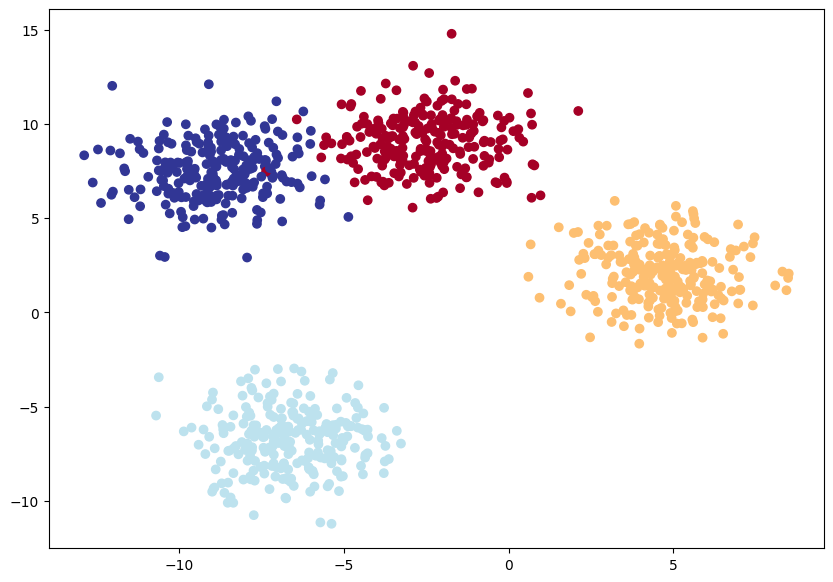

In [167]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create  multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters shakeup
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split data into train/test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)



### 8.2 Building Multi-Class Model

In [168]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [169]:
# Build model
from torch import nn
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    '''Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model.
      output_features (int): Number of output features
      hidden_units (int, optional): Number of hidden units between layers. Defaults to 8.
    '''
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create instance and send to target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [170]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [171]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Loss Function and Optimizer

In [172]:
# Loss and optimizer
loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.01)

In [174]:
model_4(X_blob_test.to(device))

tensor([[-0.7525, -0.6289,  0.8571,  1.2362],
        [-1.3717,  0.6056,  1.0315, -2.0525],
        [-0.2720,  0.3711, -1.0431, -1.4008],
        [-0.5542, -0.5493,  0.3731,  1.0306],
        [-1.3237, -0.1380,  1.6020, -0.0805],
        [-1.5037,  0.7802,  1.1486, -2.5189],
        [-0.1539,  0.1888, -1.1245, -0.9146],
        [-1.3162,  0.0531,  1.4142, -0.5866],
        [-0.4000,  0.6561, -1.0340, -2.1597],
        [-1.3056, -0.0204,  1.4582, -0.3918],
        [-1.3023,  0.1493,  1.2986, -0.8414],
        [-0.7351, -0.7239,  0.9065,  1.4883],
        [-1.3487, -0.0768,  1.5989, -0.2433],
        [-1.4123,  0.0443,  1.6219, -0.5660],
        [-1.4611,  0.0209,  1.7445, -0.5054],
        [-1.3321,  0.4854,  1.0576, -1.7330],
        [-1.3836,  0.6378,  1.0271, -2.1383],
        [-0.5445,  0.3093, -0.4212, -1.2446],
        [-1.5286,  0.6685,  1.3009, -2.2235],
        [-1.2744,  0.6668,  0.7740, -2.2121],
        [-1.4292,  0.5161,  1.2318, -1.8169],
        [-1.1837,  0.0457,  1.1454

In [175]:
X_blob_test.shape

torch.Size([200, 2])

### 8.4 Getting prediction probabilities for a multi-class PyTorch Model

In order to evaluate and train and test our model, we need to convert our model's logits to prediciton probabilities and then to prediction labels

For prediction probabilities use 'torch.softmax()'

In [176]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7525, -0.6289,  0.8571,  1.2362],
        [-1.3717,  0.6056,  1.0315, -2.0525],
        [-0.2720,  0.3711, -1.0431, -1.4008],
        [-0.5542, -0.5493,  0.3731,  1.0306],
        [-1.3237, -0.1380,  1.6020, -0.0805],
        [-1.5037,  0.7802,  1.1486, -2.5189],
        [-0.1539,  0.1888, -1.1245, -0.9146],
        [-1.3162,  0.0531,  1.4142, -0.5866],
        [-0.4000,  0.6561, -1.0340, -2.1597],
        [-1.3056, -0.0204,  1.4582, -0.3918]], device='cuda:0')

In [177]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [178]:
# Convert our models logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])



tensor([[-0.7525, -0.6289,  0.8571,  1.2362],
        [-1.3717,  0.6056,  1.0315, -2.0525],
        [-0.2720,  0.3711, -1.0431, -1.4008],
        [-0.5542, -0.5493,  0.3731,  1.0306],
        [-1.3237, -0.1380,  1.6020, -0.0805]], device='cuda:0')
tensor([[0.0693, 0.0784, 0.3464, 0.5060],
        [0.0505, 0.3650, 0.5588, 0.0256],
        [0.2711, 0.5158, 0.1254, 0.0877],
        [0.1063, 0.1068, 0.2686, 0.5184],
        [0.0379, 0.1240, 0.7067, 0.1314]], device='cuda:0')


In [179]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [180]:
torch.max(y_pred_probs[0])

tensor(0.5060, device='cuda:0')

In [181]:
# Convert model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 2, 1, 3, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1,
        1, 1, 2, 2, 3, 2, 2, 3, 3, 1, 3, 1, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 2,
        2, 2, 3, 2, 3, 3, 1, 1, 3, 3, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2,
        3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 3, 2, 2, 1, 3, 3, 2, 1, 1, 2, 2, 2, 3, 1,
        1, 2, 2, 3, 1, 2, 2, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2, 2, 3, 3, 3, 2, 1, 1,
        1, 1, 2, 2, 2, 1, 1, 3, 2, 1, 2, 2, 2, 2, 1, 3, 1, 2, 2, 1, 2, 2, 1, 2,
        1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 1, 1, 3, 1, 1, 2, 3, 1, 1, 2, 2,
        3, 2, 1, 2, 2, 3, 1, 3], device='cuda:0')

### 8.5 Training and Testing Loop for Multi-Class Model

In [182]:
# Calculate accuracy - out of 100 examples how many does our model get right
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

# Write a training and eval loop
manual_seed = 42
torch.cuda.manual_seed(manual_seed)

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

epochs = 1000

for epoch in range(epochs):
  ### Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # Logits -> probabilites -> labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  # 3.
  optimizer.zero_grad()

  # 4.
  loss.backward() # Backpropogation

  # 5.
  optimizer.step() # Gradient Descent

  ### Testing
  model_4.eval() # Put model in testing mode

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # 2. Calculate test loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds) # Changed y_pred to test_preds

    # Print out what is happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}%, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}%, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.88723%, Acc: 0.00% | Test Loss: 2.46896%, Test Acc: 0.00%
Epoch: 10 | Loss: 0.93106%, Acc: 69.12% | Test Loss: 0.85656%, Test Acc: 78.50%
Epoch: 20 | Loss: 0.57825%, Acc: 93.25% | Test Loss: 0.54649%, Test Acc: 93.50%
Epoch: 30 | Loss: 0.43337%, Acc: 96.12% | Test Loss: 0.41571%, Test Acc: 97.50%
Epoch: 40 | Loss: 0.35003%, Acc: 97.25% | Test Loss: 0.33913%, Test Acc: 98.00%
Epoch: 50 | Loss: 0.29467%, Acc: 97.50% | Test Loss: 0.28742%, Test Acc: 98.00%
Epoch: 60 | Loss: 0.25486%, Acc: 98.00% | Test Loss: 0.24968%, Test Acc: 98.50%
Epoch: 70 | Loss: 0.22473%, Acc: 98.50% | Test Loss: 0.22076%, Test Acc: 99.00%
Epoch: 80 | Loss: 0.20112%, Acc: 98.50% | Test Loss: 0.19784%, Test Acc: 99.00%
Epoch: 90 | Loss: 0.18210%, Acc: 98.75% | Test Loss: 0.17921%, Test Acc: 99.00%
Epoch: 100 | Loss: 0.16647%, Acc: 98.88% | Test Loss: 0.16377%, Test Acc: 99.00%
Epoch: 110 | Loss: 0.15340%, Acc: 98.88% | Test Loss: 0.15077%, Test Acc: 99.00%
Epoch: 120 | Loss: 0.14233%, Acc: 99.00% 

In [183]:
### 8.6 Making and evaluating predictions with a PyTorch multi-class model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View logits
y_logits[:10]

tensor([[  6.1981,  11.3778,  -9.1761,  -6.0149],
        [  2.5897, -11.8351,   1.0408,   8.3345],
        [-13.4349, -16.3801,  16.3486,   7.8530],
        [  1.9109,   7.7075,  -4.3319,  -4.5446],
        [ 10.2927,   5.1105, -10.8211,  -1.0517],
        [  2.8364, -14.7127,   1.7045,  10.2624],
        [-13.3578, -13.1977,  15.3107,   5.7961],
        [  7.9763,   0.5756,  -7.4252,   1.4054],
        [-14.5225, -21.8757,  18.9702,  11.2001],
        [  8.6360,   2.1947,  -8.4923,   0.4922]], device='cuda:0')

In [184]:
# Logits to prediciton probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[5.5986e-03, 9.9440e-01, 1.1780e-09, 2.7799e-08],
        [3.1871e-03, 1.7328e-09, 6.7721e-04, 9.9614e-01],
        [1.1616e-13, 6.1095e-15, 9.9980e-01, 2.0432e-04],
        [3.0288e-03, 9.9696e-01, 5.8894e-06, 4.7610e-06],
        [9.9440e-01, 5.5842e-03, 6.7289e-10, 1.1769e-05],
        [5.9511e-04, 1.4228e-11, 1.9187e-04, 9.9921e-01],
        [3.5432e-13, 4.1584e-13, 9.9993e-01, 7.3760e-05],
        [9.9799e-01, 6.0960e-04, 2.0434e-07, 1.3977e-03],
        [2.8454e-15, 1.8225e-18, 9.9958e-01, 4.2201e-04],
        [9.9812e-01, 1.5913e-03, 3.6347e-08, 2.8997e-04]], device='cuda:0')

In [185]:
# Prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [186]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

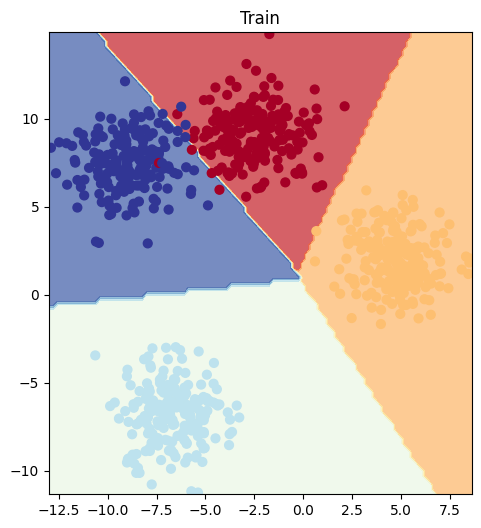

In [187]:
# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

## 9. A few more classification metrics to evaluate our model

* Accuracy – How many predictions were correct overall.

* Precision – Of what the model guessed, how many were actually right.

* Recall – Of the real answers, how many the model found.

* F1-Score – A balance between precision and recall.

* Confusion Matrix – A table showing what the model got right and wrong.

* Classification Report – A summary of all the scores per class.


**Look at PyTorch documentation for what you need**

In [188]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [193]:
from torchmetrics import Accuracy

# Setup metric
# Initialize Accuracy with task='multiclass' and the number of classes
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASSES, average='macro').to(device)

# Calculate metric - pass raw logits and true labels
torchmetric_accuracy(y_logits, y_blob_test)

tensor(0.9956, device='cuda:0')